### Improved program for mapping digits of prime reciprocals to 2D walks

In [1]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpmath import*
#MpMath lets us load arbitrary decimals

In [2]:
#Load primes - suggest can generate if so desired
primes = np.genfromtxt('primes.txt')
#Skip 2, 3, 5
primes = [int(p) for p in primes][3:]

In [3]:
#Arbitrary base conversion
def num2base(n, b):
    if n == 0: return [0]
    digits = []
    while n: digits.append(int(n % b)); n //= b
    return np.array(digits[::-1])
    #courtesy of Salvador Dali on stackoverflow

In [4]:
#Many plotting methods are available, mine supports multicolored line plots
def primeFraction(digits, base, name, save=False):
    #Directions availible as function of base
    thetas = np.linspace(0,int(360*(1-1/base)),base)
    #Note that for base2, this would produce thetas = [0,180]
    #which would walk back and forth, so one should do thetas = [0,x], x!=180
    
    X = []; Y = []
    x = 0; y = 0; theta = 0
    #Main loop to collect the path
    for d in digits:
        theta += np.deg2rad(thetas[d])
        x += cos(theta)
        y += sin(theta)
        X.append(x)
        Y.append(y)
    
    #Plotting -- 3D version to come!
    plt.rcParams['figure.figsize'] = [5,5]
    #To plot the path, we simply draw lines from point [x,y] to [x+1,y+1]
    colors = cm.turbo(np.linspace(0, 1, len(X))) #color as function of step
    for i in range(len(X)-1):
        plt.plot([X[i],X[i+1]],[Y[i],Y[i+1]], alpha=0.5, color=colors[i], linewidth=5)
    #Note that no for-loop is necessary if one is using one color, or a scatter plot
    
    plt.axis('equal'); plt.axis('off')
    plt.title(name); plt.tight_layout()
    plt.show(); plt.close()

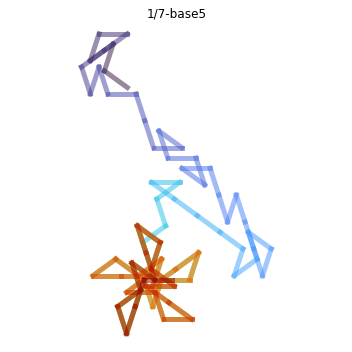

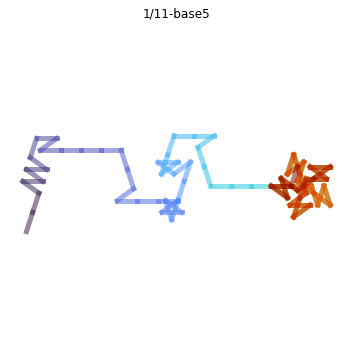

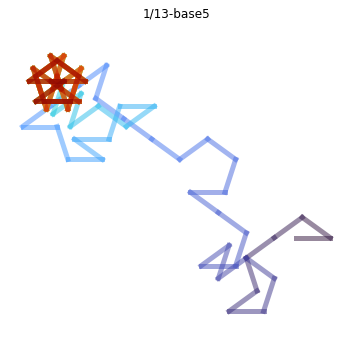

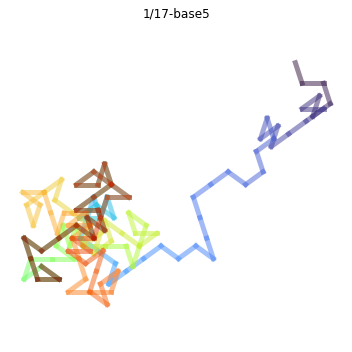

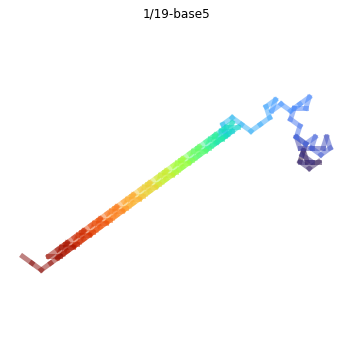

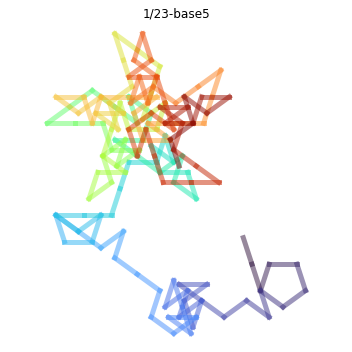

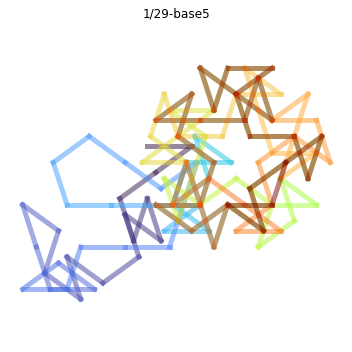

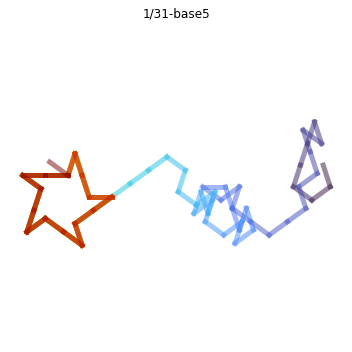

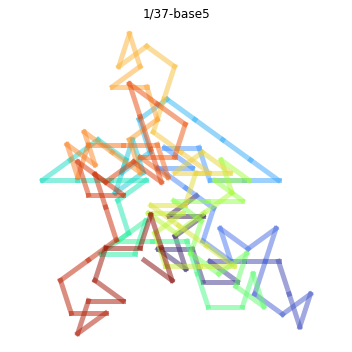

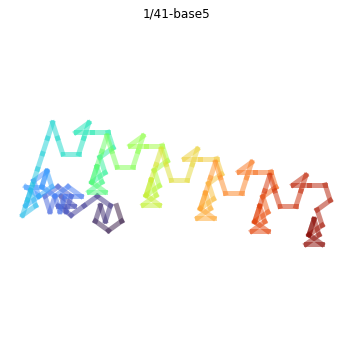

In [7]:
#Let's give it a go!
base = 5
lim = 100
mp.dps = lim
count = 10

#Here we're looping through the first 100 primes in base 5 with 500 digits
for i in range(count):
    p = primes[i]
    title = '1/'+str(p)+' - base '+str(base)
    num = int(str(mpf(1)/p).replace('.',''))
    new_num = num2base(num,base)
    primeFraction(new_num, base, title)

In [6]:
#anywallsocket@github.com